# img compression using kmeans

In [ ]:
import os
import sys

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    """ Load image from path. Return a numpy array """
    image = Image.open('/content/lena.jpg')
    return np.asarray(image) / 255


def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]


def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c


def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids


def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (previous_centroids==centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx


def main():
    try:
        image_path = sys.argv[1]
        assert os.path.isfile(image_path)
    except (IndexError, AssertionError):
        print('Please specify an image')

    # Load the image
    image = load_image(image_path)
    w, h,d = image.shape
    print('Image found with width: {}, height: {}'.format(w, h))

    # Get the feature matrix X
    X = image.reshape((w * h, d))
    K = 40 # the number of colors in the image

    # Get colors
    print('Runnign K-means')
    colors, _ = find_k_means(X, K, max_iters=20)

    # Indexes for color for each pixel
    idx = find_closest_centroids(X, colors)

    # Reconstruct the image
    idx = np.array(idx, dtype=np.uint8)
    X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
    compressed_image = Image.fromarray(X_reconstructed)

    # Save reconstructed image to disk
    compressed_image.save('out.png')


if __name__ == '__main__':
    main()

Please specify an image
Image found with width: 225, height: 225
Runnign K-means


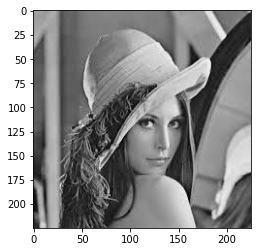

In [ ]:
img_path = "/content/lena.jpg"
src = np.array(Image.open(img_path).convert("L"))
plt.imshow(src)
plt.show()

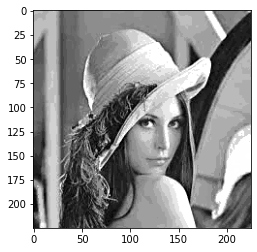

In [ ]:
img_path = "/content/out.png"
src = np.array(Image.open(img_path).convert("L"))
plt.imshow(src)
plt.show()